<a href="https://colab.research.google.com/github/tansexe/AD-Lab/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [ ]:
def time_to_minutes(t):
    if isinstance(t, int):  # Check if t is already an integer (in minutes)
        return t
    try:
        # Try parsing with the original format
        t = datetime.strptime(t, "%H:%M")
    except ValueError:
        # If the original format fails, try parsing with an alternate format
        t = datetime.strptime(t, "%H:%M %d %b")

    return t.hour * 60 + t.minute

In [ ]:
df["Dep_Time"] = df["Dep_Time"].apply(time_to_minutes)
df["Arrival_Time"] = df["Arrival_Time"].apply(time_to_minutes)

In [ ]:
def duration_to_minutes(duration):
    h, m = 0, 0
    if "h" in duration:
        h = int(duration.split("h")[0])
    if "m" in duration:
        m = int(duration.split("m")[0].split()[-1])
    return h * 60 + m

df["Duration"] = df["Duration"].apply(duration_to_minutes)

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
df['Total_Stops'] = df['Total_Stops'].map(stop)

In [ ]:
print(df["Total_Stops"].unique())

[0 2 1 3 4]


In [ ]:
# Label Encoding for Categorical Features
le = LabelEncoder()
for col in ["Airline", "Source", "Destination", "Additional_Info", "Route"]:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Display Encoded Data
df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
5271,3,1,4,127,1175,1315,140,0,8,3597,27,5
6296,3,1,4,127,800,935,135,0,8,3384,21,3
1428,3,4,3,48,1205,1300,95,0,8,2227,1,5
3251,3,2,1,104,285,1260,975,1,8,10518,9,3
7111,6,2,1,104,600,1260,660,1,8,13727,15,5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model = RandomForestRegressor()

In [ ]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = ml_model.predict(X_test)

In [ ]:
y_pred

array([16853.58,  5160.36,  8914.58, ...,  3532.32,  6665.65,  7005.48])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test, y_pred)

0.8629550556582164

In [ ]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score is {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('predictions {}'.format(y_prediction))
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE  : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSA  : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE : {}'.format(metrics.mean_absolute_percentage_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    plt.figure(figsize=(10, 8))
    sns.histplot(y_test - y_prediction, bins=50, kde=True, alpha=0.7)
    plt.xlabel("Residuals (y_test - y_prediction)")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")
    plt.grid(True)
    plt.show()

Training Score is 0.9799563025539617
predictions [16837.9   5141.62  8860.47 ...  3508.56  6493.51  7070.13]
r2 score : 0.8696246220179997
MAE  : 641.3556621561391
MSA  : 2687431.1106749494
MAPE : 0.07343717770590381
RMSE : 1639.3386198936903


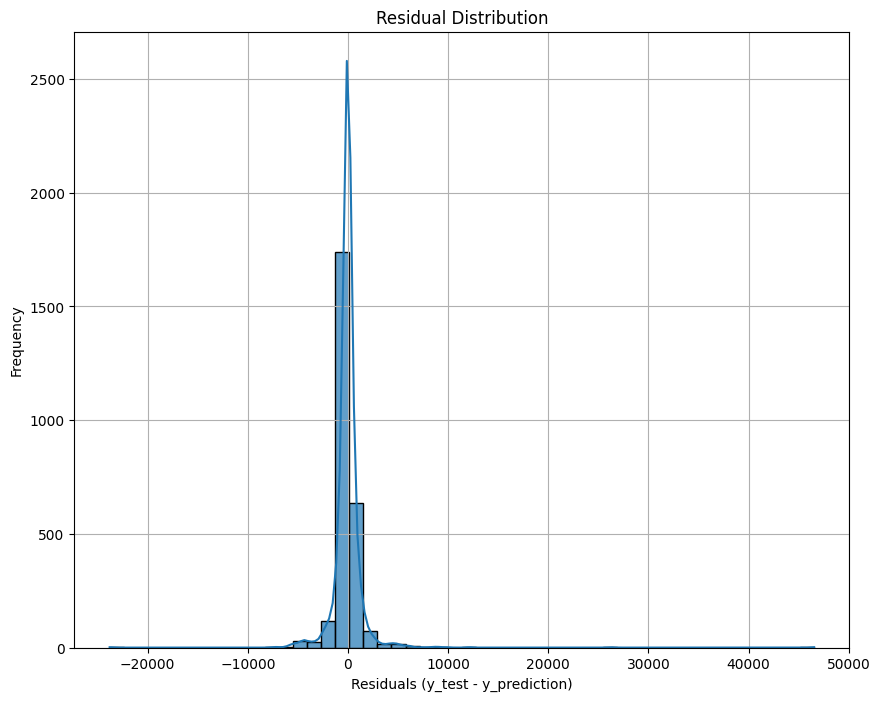

In [ ]:
predict(RandomForestRegressor())

Training Score is 0.9957490303128045
predictions [16840.  4959.  9187. ...  3419.  5797.  7514.]
r2 score : 0.7867083761287379
MAE  : 754.771870710096
MSA  : 4396585.877719539
MAPE : 0.08325025709420043
RMSE : 2096.8037289454487


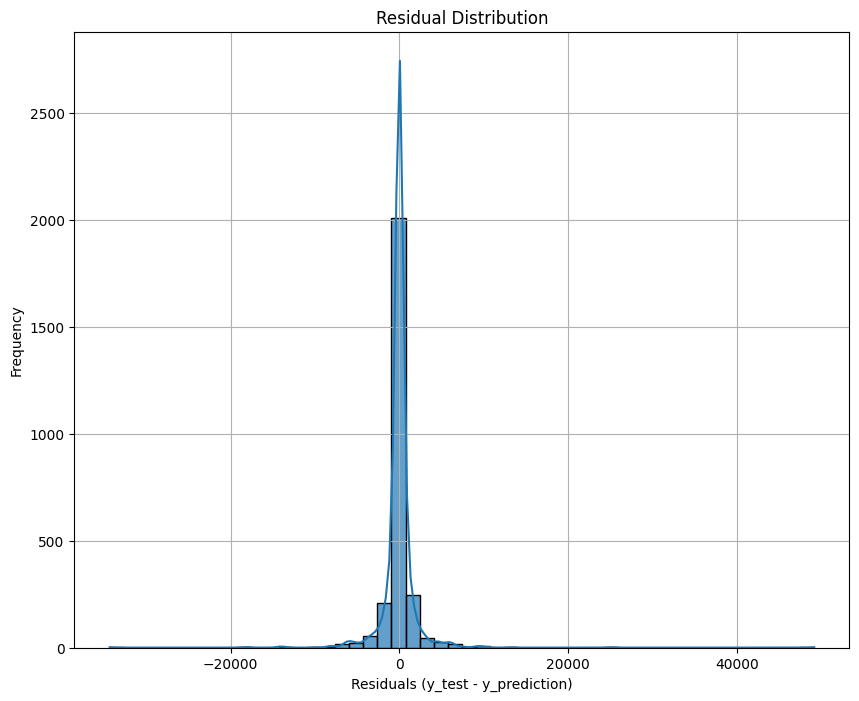

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())